# 데이터 인코딩

## 레이블 인코딩(Label Encoding)

In [2]:
# target에만 적용해야 함

from sklearn.preprocessing import LabelEncoder

 
items = ["청바지", "치마", "청바지", "원피스", "청바지", "치마", "치마", "청바지", "원피스"]

lbl_encoder = LabelEncoder()
lbl_encoder.fit(items)

LabelEncoder()

- 문자열 --> 숫자 변환

In [3]:
# encoding = 문자열 -> 숫자로 변환(transform)
labels = lbl_encoder.transform(items)
labels

array([1, 2, 1, 0, 1, 2, 2, 1, 0])

In [4]:
# decoding:  숫자 -> 문자 (inverse_transform)
lbl_encoder.inverse_transform([1, 2, 1, 0, 1, 2, 2, 1, 0])


array(['청바지', '치마', '청바지', '원피스', '청바지', '치마', '치마', '청바지', '원피스'],
      dtype='<U3')

In [5]:
# 클래스 확인
lbl_encoder.classes_

array(['원피스', '청바지', '치마'], dtype='<U3')

## 원-핫 인코딩(one-hot encoding)

In [6]:
from sklearn.preprocessing import OneHotEncoder

ohe_encoder = OneHotEncoder()

In [7]:
import numpy as np

# 1차원 배열 -> 2차원 배열
# vector -> matrix 화
# N -> N x 1

 
items = ["청바지", "치마", "청바지", "원피스", "청바지", "치마", "치마", "청바지", "원피스"]
items_arr = np.array(items).reshape(-1,1) 
#-(1,1)--> 갖고있는 모든 걸, 열의 수 1에 맞춰서 바꿔라
items_arr

array([['청바지'],
       ['치마'],
       ['청바지'],
       ['원피스'],
       ['청바지'],
       ['치마'],
       ['치마'],
       ['청바지'],
       ['원피스']], dtype='<U3')

In [8]:
# ohe_encoder.fit(items_arr)
# ohe_labels = ohe_encoder.transform(items_arr)

# fit과 transform을 한꺼번에
ohe_labels = ohe_encoder.fit_transform(items_arr)
ohe_labels

<9x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [9]:
# 희소행렬의 압축된 표현
print(ohe_labels)

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 1)	1.0
  (8, 0)	1.0


- **희소행렬** (sparse_matrix)
    - 거의 다 0이고 소수의 데이터가 1인 행렬
    - 데이터 많이 잡아먹음
    - dummy 행렬
    - 0행 1열에 1이 있다.
    - 1행 2열에 1이 있다.

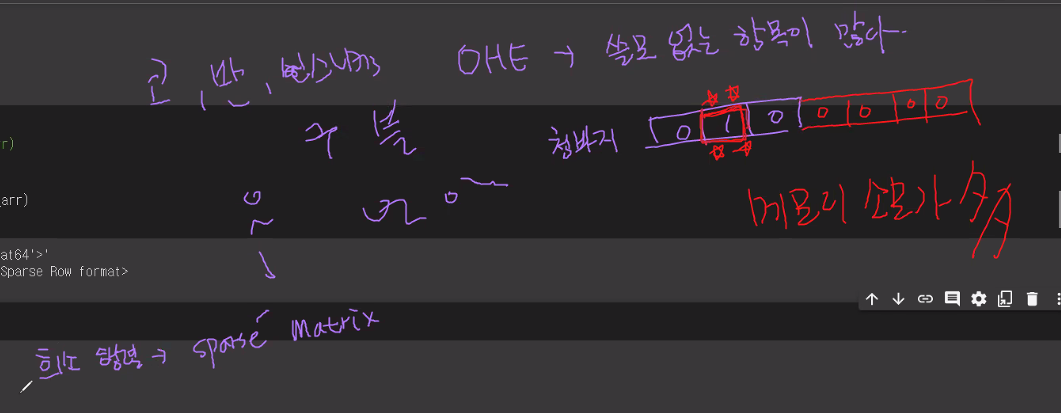

In [10]:
# 압축된 희소행렬 형태를 풀어서 표현
ohe_labels.toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

# Feature 스케일링

## MinMax Scaling(정규화)
- 데이터 범위를 0~1로 조정

In [11]:
import pandas as pd
movie_score = pd.DataFrame({
    "naver":[0, 2, 4, 6, 8],
    "netflix":[1, 2, 3, 4, 5]
}) # 평점

movie_score

,naver,netflix
0,0,1
1,2,2
2,4,3
3,6,4
4,8,5


In [12]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [13]:
# 입력, 변환 동시에
movie_score_scaled = min_max_scaler.fit_transform(movie_score)
movie_score_scaled

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [14]:
pd.DataFrame(movie_score_scaled, columns=['Naver_Scaled','Netflix_Scaled'])

,Naver_Scaled,Netflix_Scaled
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


## Standard Scaling(표준화)
- 데이터를 정리한다는 개념
- 흐트러진 데이터를 원점 기준으로 정리
- 평균은 0, 표준편차는 1로 변환
- 값을 0으로 맞춰줄 때 사용

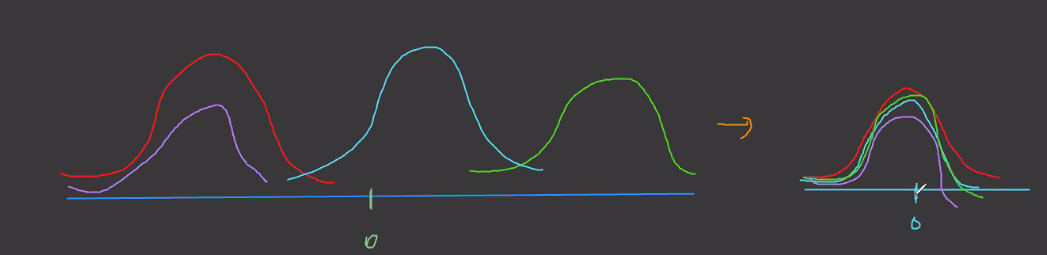

In [15]:
data1 = np.array([100,110,120,130,140])
data2 = np.array([0,1,2,3,4])

In [16]:
data1.mean(), data1.std()

(120.0, 14.142135623730951)

In [17]:
data2.mean(), data2.std()

(2.0, 1.4142135623730951)

In [18]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [19]:
data1_scaled = std_scaler.fit_transform(data1.reshape(-1,1))
data2_scaled = std_scaler.fit_transform(data2.reshape(-1,1))

In [20]:
print(data1_scaled)
print()
print(data2_scaled)

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


In [21]:
data1_scaled.mean(), data1_scaled.std()

(0.0, 0.9999999999999999)

In [22]:
data2_scaled.mean(), data2_scaled.std()

(0.0, 0.9999999999999999)

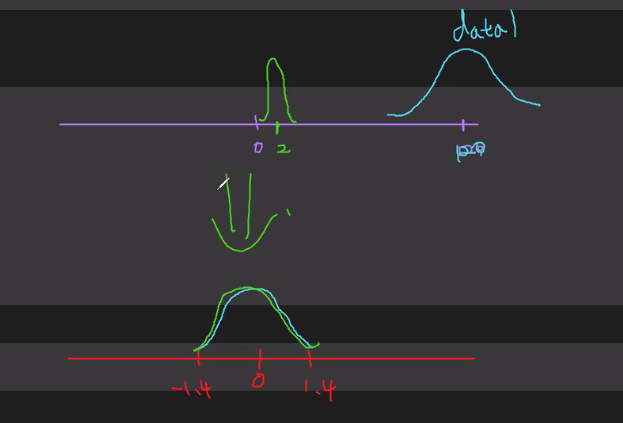